## Simple Rate of Returns and Logarithmic Returns

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [3]:
# PG = wb.DataReader('PG', data_source='yahoo', start= '1995-1-1')
PG = pd.read_csv('PG_1995-03_23_2017.csv', index_col = 'Date')
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,62.375,15.59375,3318400
1995-01-04,15.53125,15.65625,15.31250,61.875,15.46875,2218800
1995-01-05,15.37500,15.43750,15.21875,61.000,15.25000,2319600
1995-01-06,15.15625,15.40625,15.15625,61.125,15.28125,3438000
1995-01-09,15.34375,15.40625,15.18750,60.875,15.21875,1795200


In [4]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-17,91.449997,92.000000,90.919998,91.000000,91.000000,37010100
2017-03-20,90.959999,91.410004,90.940002,91.220001,91.220001,7772900
2017-03-21,91.300003,91.750000,91.029999,91.190002,91.190002,8211000
2017-03-22,91.309998,91.800003,90.750000,90.989998,90.989998,7798000
2017-03-23,90.910004,91.459999,90.599998,90.769997,90.769997,6831400


### Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
# Using Adj. Closing Price
# .shift(1) can use yesterday's stock price

PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2017-03-17   -0.004812
2017-03-20    0.002418
2017-03-21   -0.000329
2017-03-22   -0.002193
2017-03-23   -0.002418
Name: simple_return, Length: 5596, dtype: float64

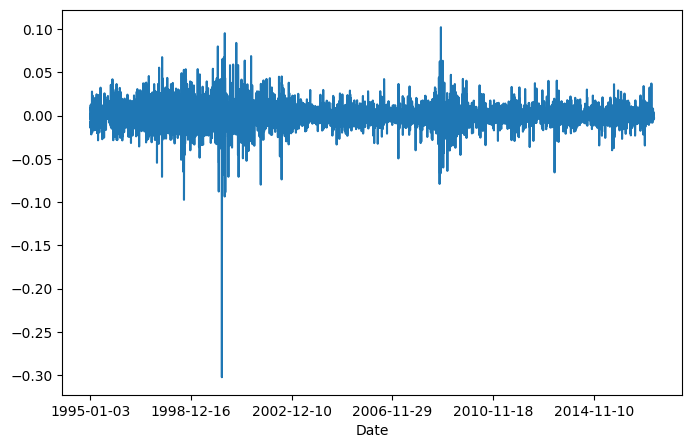

In [19]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [7]:
# Mean daily return of P&G:
avg_returns_d = PG['simple_return'].mean()
print(f"Average Returns of P&G: {avg_returns_d:.4%}")

Average Returns of P&G: 0.0419%


In [10]:
# Mean annualy return: 
# Annual don't count as 365: exclude non-trading days (Sat,Sun, Bank Holiday)
# around 250, 251 252 depending on year

avg_returns_a = avg_returns_d * 250
# avg_returns_a
print(f"Average Annual Returns of P&G: {avg_returns_a:.4%}")

Average Annual Returns of P&G: 10.4824%


In [11]:
## Log Returns

In [12]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
1995-01-03,15.46875,15.62500,15.43750,62.375,15.59375,3318400,NaN
1995-01-04,15.53125,15.65625,15.31250,61.875,15.46875,2218800,-0.008016
1995-01-05,15.37500,15.43750,15.21875,61.000,15.25000,2319600,-0.014141
1995-01-06,15.15625,15.40625,15.15625,61.125,15.28125,3438000,0.002049
1995-01-09,15.34375,15.40625,15.18750,60.875,15.21875,1795200,-0.004090


In [13]:
# Log Return
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: log_return, Length: 5596, dtype: float64

<Axes: xlabel='Date'>

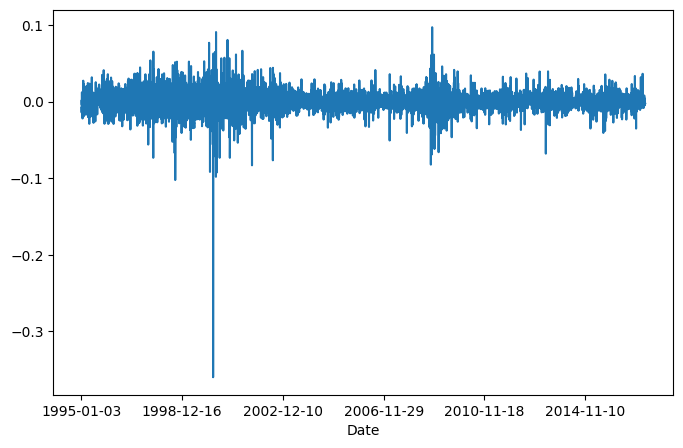

In [14]:
PG['log_return'].plot(figsize=(8,5))

In [17]:
# Log Mean return: 
log_returns_d = PG['log_return'].mean()

#Log Mean Annual Return:
log_returns_a = PG['log_return'].mean() * 250

print(f"Average Log Daily Returns of P&G: {log_returns_d:.4%}")
print(f"Average Log Annual Returns of P&G: {log_returns_a:.4%}")

Average Log Daily Returns of P&G: 0.0315%
Average Log Annual Returns of P&G: 7.8707%


In [20]:
## Return of Portfolio Securities:

In [22]:
# tickers = ['PG', 'MSFT','F','GE']
# mydata = pd.DataFrame()
# for t in tickers:
#     mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

mydata = pd.read_csv('4_stocks_1995_2017.csv', index_col = 'Date')
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5779 entries, 1995-01-03 to 2017-12-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      5779 non-null   float64
 1   MSFT    5779 non-null   float64
 2   F       5779 non-null   float64
 3   GE      5779 non-null   float64
dtypes: float64(4)
memory usage: 225.7+ KB


In [23]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.960464,2.498429,5.091914,4.479902
1995-01-04,8.888638,2.516591,5.228918,4.479902
1995-01-05,8.762941,2.475080,5.183250,4.490882
1995-01-06,8.780898,2.516591,5.183250,4.468922
1995-01-09,8.744981,2.501024,5.274583,4.425002


In [25]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


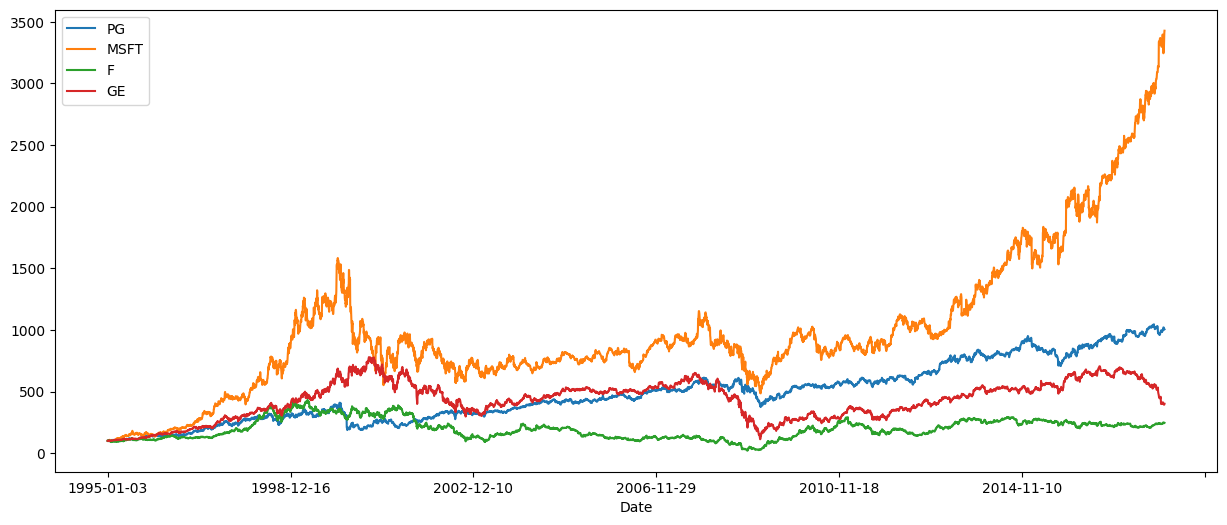

In [26]:
# Normalization to 100:

#Extract data from first column:
mydata.iloc[0]

#Display to compare behaviour where they all start from the same value (100):
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

# Microsoft is the clear winner -> beats others in stock price performance 

In [28]:
## Calculate Simple Return with the stocks:

returns = (mydata / mydata.shift(1)) - 1
returns.head() 

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [29]:
# Annual returns for each stock:
annual_returns = returns.mean() * 250
annual_returns

PG      0.125201
MSFT    0.202795
F       0.118984
GE      0.102481
dtype: float64

In [30]:
# Weightage for each stock: 0.25
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Use np.dot to multiply returns and weights (vector/matrix product)
pfolio_1 = np.dot(annual_returns, weights)
print(f"Portfolio 1 Performance: {pfolio_1:.3%}")

Portfolio 1 Performance: 13.737%


In [31]:
# Using different weightage to compare:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

pfolio_2 = np.dot(annual_returns, weights_2)
print(f"Portfolio 2 Performance: {pfolio_2:.3%}")

Portfolio 2 Performance: 15.417%


## Return of Indices

In [32]:
ind_data = pd.read_csv('Indices_Data_1.csv', index_col = 'Date')
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
02/01/1997,737.010010,1280.699951,2848.800049
03/01/1997,748.030029,1310.680054,2859.300049
06/01/1997,747.650024,1316.400024,2881.300049
07/01/1997,753.229980,1327.729980,2886.100098
08/01/1997,748.409973,1320.349976,2906.300049


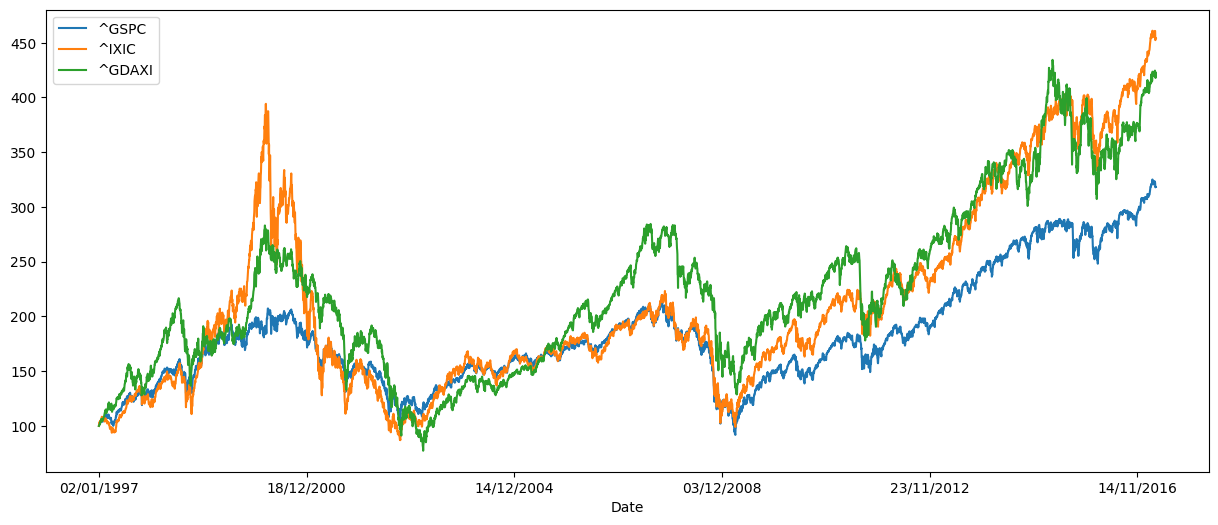

In [34]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [35]:
# indices simple returns:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
17/03/2017,-0.001314,0.000041,0.000998
20/03/2017,-0.002010,0.000090,-0.003501
21/03/2017,-0.012408,-0.018249,-0.007531
22/03/2017,0.001890,0.004800,-0.004849
23/03/2017,-0.001060,-0.000679,0.011388


In [36]:
# Annual returns:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

#Positive rate of returns in the past decades 

^GSPC     0.075836
^IXIC     0.107076
^GDAXI    0.100426
dtype: float64